In [1]:
%matplotlib inline

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/hpo/hpo_ml_short.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/hpo/hpo_ml_short.ipynb)

## hyperparameter optimization with Model class

In [ ]:
try:
    import ai4water
except (ImportError, ModuleNotFoundError):
    !pip install ai4water[hpo]

In [2]:

from ai4water.functional import Model
from ai4water.datasets import MtropicsLaos
from ai4water.utils.utils import get_version_info
from ai4water.hyperopt import Categorical, Real, Integer


D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
for k,v in get_version_info().items():
    print(f"{k} version: {v}")

python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.3
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [4]:
# prepare the data

dataset = MtropicsLaos(path="F:\\data\\MtropicsLaos")
data = dataset.make_regression(lookback_steps=1)
print(data.shape)


    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


(258, 9)


In [5]:
input_features = data.columns.tolist()[0:-1]
print(input_features)

['air_temp', 'rel_hum', 'wind_speed', 'sol_rad', 'water_level', 'pcp', 'susp_pm', 'Ecoli_source']


In [6]:
output_features = data.columns.tolist()[-1:]
print(output_features)

['Ecoli_mpn100']


build the model



In [7]:
model = Model(
    model = {"RandomForestRegressor": {
        "n_estimators": Integer(low=5, high=30, name='n_estimators', num_samples=10),
       "max_leaf_nodes": Integer(low=2, high=30, prior='log', name='max_leaf_nodes', num_samples=10),
        "min_weight_fraction_leaf": Real(low=0.0, high=0.5, name='min_weight_fraction_leaf', num_samples=10),
        "max_depth": Integer(low=2, high=10, name='max_depth', num_samples=10),
        "min_samples_split": Integer(low=2, high=10, name='min_samples_split', num_samples=10),
        "min_samples_leaf": Integer(low=1, high=5, name='min_samples_leaf', num_samples=10),
    }},
    input_features=input_features,
    output_features=output_features,
    cross_validator = {"KFold": {"n_splits": 5}},
    x_transformation="zscore",
    y_transformation={"method": "log", "replace_zeros": True, "treat_negatives": True},
)


            building ML model for  
            regression problem using RandomForestRegressor


In [8]:
_ = model.fit_on_all_training_data(data=data)

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)
***** Validation *****
input_x shape:  (36, 8)
target shape:  (36, 1)


In [9]:
model.evaluate_on_training_data(data=data, metrics=['r2', 'nse', 'rmse'])

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


{'r2': 0.3385343966771821,
 'nse': 0.18031791063563973,
 'rmse': 6265.1971373453935}

In [10]:
model.evaluate_on_test_data(data=data, metrics=['r2', 'nse', 'rmse'])

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


{'r2': 0.20836113506644485,
 'nse': 0.06366103870021012,
 'rmse': 25337.721938256364}

In [11]:
optimizer = model.optimize_hyperparameters(
    data=data,
    num_iterations=60,
    process_results=False
)

Iteration No.   Validation Score    



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


0               1.07374              -0.07374            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


1               1.02094              -0.02094            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


2               1.02835              -0.02835            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


3               1.03373              -0.03373            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


4               1.08107              -0.08107            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


5               0.99689              0.00311             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


6               0.80898              0.19102             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


7               1.04241              -0.04241            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


8               1.00918              -0.00918            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be re

9               1.08922              -0.08922            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


10              0.81720              0.18280             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


11              0.90958              0.09042             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


12              0.81080              0.18920             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


13              0.91662              0.08338             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


14              1.03977              -0.03977            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


15              0.80154              0.19846             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


16              0.81011              0.18989             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


17              0.84773              0.15227             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


18              0.83578              0.16422             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


19              0.81106              0.18894             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


20              0.82395              0.17605             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


21              0.80951              0.19049             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


22              0.83577              0.16423             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


23              1.10348              -0.10348            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


24              0.81620              0.18380             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


25              0.82285              0.17715             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


26              0.81011              0.18989             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


27              0.85432              0.14568             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


28              0.80938              0.19062             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


29              1.01737              -0.01737            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


30              0.81163              0.18837             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


31              0.80957              0.19043             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


32              0.82288              0.17712             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


33              0.80957              0.19043             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


34              0.80651              0.19349             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


35              0.80798              0.19202             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


36              0.81120              0.18880             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


37              0.84547              0.15453             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


38              1.10348              -0.10348            



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


39              0.82228              0.17772             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


40              0.85210              0.14790             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


41              0.81127              0.18873             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


42              0.80474              0.19526             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


43              0.85714              0.14286             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


44              0.85509              0.14491             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


45              0.80784              0.19216             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


46              0.81651              0.18349             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


47              0.81049              0.18951             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


48              0.80938              0.19062             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


49              0.81126              0.18874             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


50              0.82775              0.17225             


The objective has been evaluated at this point before.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


51              0.80957              0.19043             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


52              0.82168              0.17832             


The objective has been evaluated at this point before.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


53              0.80957              0.19043             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


54              0.80912              0.19088             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


55              0.80197              0.19803             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


56              0.81139              0.18861             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


57              0.90115              0.09885             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


58              0.80836              0.19164             



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.

            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


59              0.96081              0.03919             
***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)
***** Validation *****
input_x shape:  (36, 8)
target shape:  (36, 1)


0 is not equal to 60 so can not perform ranking


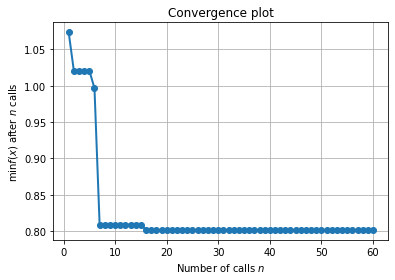

In [21]:
_ = optimizer._plot_convergence()

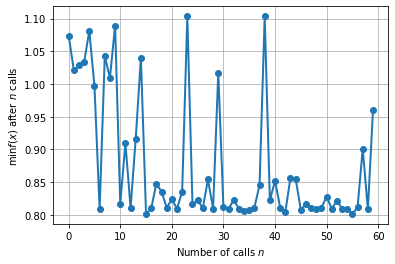

In [22]:
_ = optimizer._plot_convergence(original=True)

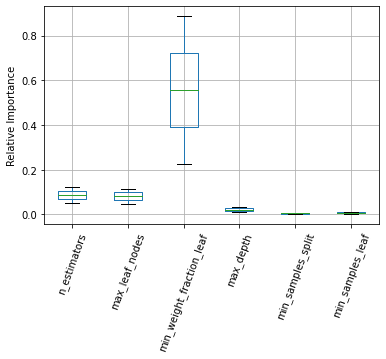

In [23]:
_ = optimizer.plot_importance()

In [24]:
optimizer.best_iter()

15

In [25]:
optimizer.best_paras()

{'n_estimators': 25,
 'max_leaf_nodes': 15,
 'min_weight_fraction_leaf': 0.001739798853597343,
 'max_depth': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 5}

In [26]:
print(model.config['model'])

{'RandomForestRegressor': {'n_estimators': 25, 'max_leaf_nodes': 15, 'min_weight_fraction_leaf': 0.001739798853597343, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 5, 'random_state': 313}}


In [27]:
print(model._model)

RandomForestRegressor(max_depth=10, max_leaf_nodes=15, min_samples_leaf=5,
                      min_samples_split=4,
                      min_weight_fraction_leaf=0.001739798853597343,
                      n_estimators=25, random_state=313)


In [28]:
model.evaluate_on_test_data(data=data, metrics=['r2', 'nse', 'rmse'])

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


{'r2': 0.3063041509312758,
 'nse': 0.13576138488161404,
 'rmse': 24342.64983848084}

In [29]:
model.evaluate_on_training_data(data=data, metrics=['r2', 'nse', 'rmse'])

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)



            argument test is deprecated and will be removed in future. Please 
            use 'predict_on_test_data' method instead.


{'r2': 0.5529474548618499,
 'nse': 0.3402599835332679,
 'rmse': 5620.803870884389}